 # Support Vector Machine 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
X = X[y != 0] [:, [0,2]]  
y = y[y != 0]

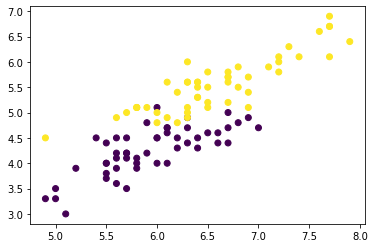

In [5]:
# 5a it is not linearly seperable 
plt.scatter(X[:,0],X[:,1], c=y)

In [6]:
# 5b
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params_grid = [
    {'C': np.logspace(-2, 2.0, num=10)}
]

svc = SVC(kernel='linear')
clf = GridSearchCV(svc, params_grid, cv=10)
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02])}])

In [7]:
# 5b table
for c_value, cv_results in zip(params_grid[0]['C'], clf.cv_results_['mean_test_score']):
    svc.C = c_value  
    svc.fit(X, y)  
    error_rate = 1 - cv_results
    num_support_vectors = len(svc.support_vectors_)
    print(f"C = {c_value}, Error rate: {error_rate}, Number of support vectors: {num_support_vectors}")

C = 0.01, Error rate: 0.1499999999999998, Number of support vectors: 92
C = 0.027825594022071243, Error rate: 0.11999999999999988, Number of support vectors: 78
C = 0.0774263682681127, Error rate: 0.08000000000000007, Number of support vectors: 61
C = 0.21544346900318834, Error rate: 0.06999999999999995, Number of support vectors: 46
C = 0.5994842503189409, Error rate: 0.06999999999999995, Number of support vectors: 37
C = 1.6681005372000592, Error rate: 0.06999999999999995, Number of support vectors: 26
C = 4.6415888336127775, Error rate: 0.05999999999999994, Number of support vectors: 21
C = 12.915496650148826, Error rate: 0.05999999999999994, Number of support vectors: 17
C = 35.93813663804626, Error rate: 0.07999999999999985, Number of support vectors: 15
C = 100.0, Error rate: 0.06999999999999995, Number of support vectors: 14


In [8]:
# 5c best value
best = clf.best_params_['C']

In [9]:
final_svc = SVC(kernel='linear', C=best)
final_svc.fit(X, y)

SVC(C=4.6415888336127775, kernel='linear')

/var/folders/fd/qmhdtpdj7kj77ftrqfj87hmc0000gn/T/ipykernel_50744/1616262973.py:15: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])


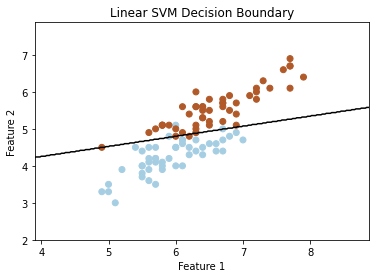

In [10]:
# Generate a meshgrid of points spanning the feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class labels for the points in the grid
Z = final_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot the decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])

# Add labels and show the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM Decision Boundary')
plt.show()